In [124]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [125]:
titanic_data = pd.read_csv('titanic-train.csv')
titanic_data = titanic_data[titanic_data['Age'].notnull()]
titanic_data = titanic_data[titanic_data['Embarked'].notnull()]
titanic_data = titanic_data.drop(columns=['Cabin'])
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [126]:
titanic_data = pd.get_dummies(titanic_data, columns=['Sex'], prefix='gender')
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'])

In [127]:
x = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket'])
y = titanic_data[['Survived']]

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.8, test_size=0.2)

lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression()

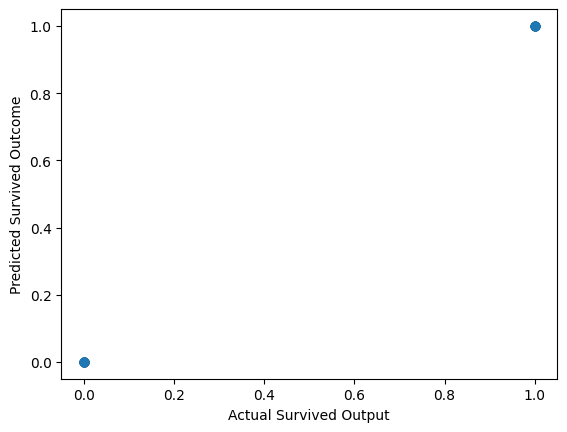

In [128]:
y_predict = lr.predict(test_x)
plt.scatter(test_y, y_predict, alpha=0.4)
plt.xlabel('Actual Survived Output')
plt.ylabel('Predicted Survived Outcome')
plt.show()

In [129]:
y_predict = abs(y_predict.round())
y_predict_series = pd.Series(y_predict.flatten())
y.loc[:, 'Predicted_Survived'] = y_predict_series
y

/var/folders/r0/g3x73kzj4yd2gh62fmpy7fl40000gn/T/ipykernel_92414/4134032271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[:, 'Predicted_Survived'] = y_predict_series


,Survived,Predicted_Survived
0,0,0.0
1,1,0.0
2,1,0.0
3,1,1.0
4,0,0.0
...,...,...
885,0,NaN
886,0,NaN
887,1,NaN
889,1,NaN
